# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 5

Do wykonania laboratorium można skorzystać z bibliotek/modułów:
- [numpy](https://numpy.org/)
- [matplotlib](https://matplotlib.org/)
- [pandas](https://pandas.pydata.org/)
- [collections](https://docs.python.org/3/library/collections.html)


### Zadanie 1

Wczytaj plik `english.10MB`
> Podpowiedź: Kodowanie `iso-8859-1`



In [9]:
import string
from collections import Counter
import matplotlib.pyplot as plt

with open("english.10MB", "r", encoding="iso-8859-1") as file:
    data = file.read()

### Zadanie 2
Zamień wszystkie litery na małe.


In [7]:
data = data.lower()

### Zadanie 3
Znajdź unikalne litery (pomiń inne znaki) w tekście i dla każdej przypisz liczbę wystąpień, a następnie wyświetl histogram.

Pytanie: Jaka litera występuje najczęściej?

> Podpowiedź: `import string`


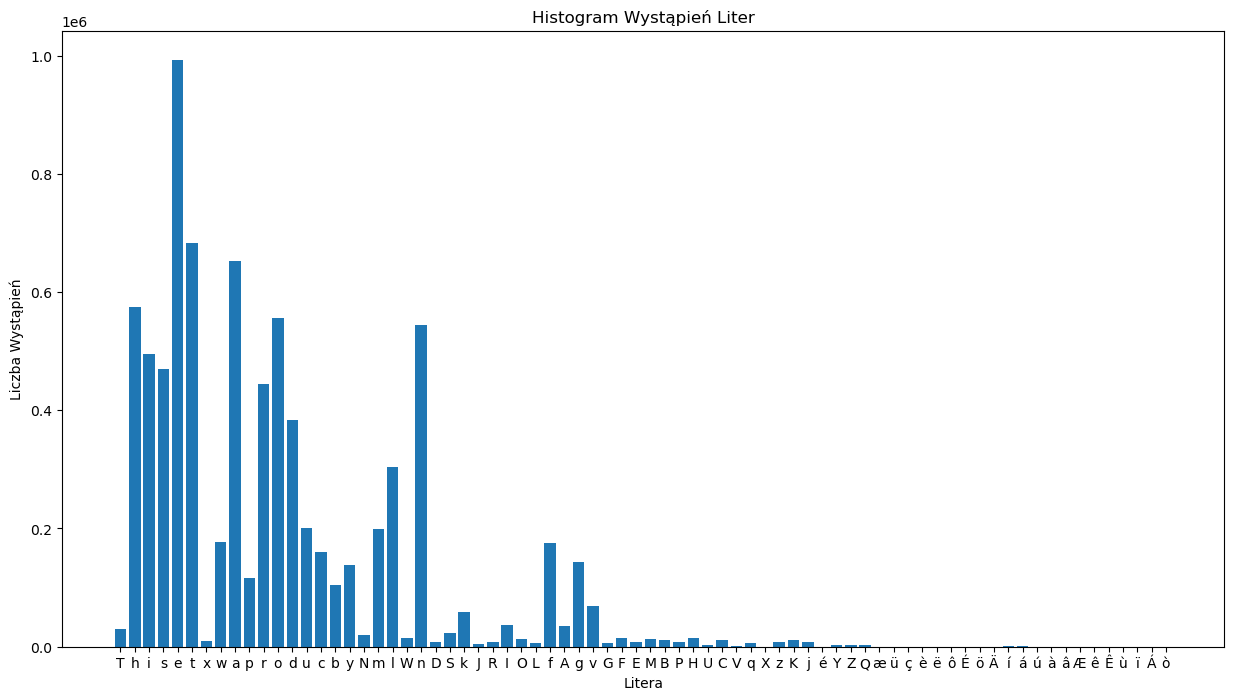

Most common letter: e, quanity: 992360


In [23]:
cleaned_text = ''.join(c for c in data if c.isalpha())
letter_counts = Counter(cleaned_text)

plt.figure(figsize=(15,8))
plt.bar(letter_counts.keys(), letter_counts.values())
plt.xlabel('Litera')
plt.ylabel('Liczba Wystąpień')
plt.title('Histogram Wystąpień Liter')
plt.show()
most_common_letter, quanity = letter_counts.most_common(1)[0]
print(f'Most common letter: {most_common_letter}, quanity: {quanity}')

### Zadanie 4

Napisz funkcję, która dla podanego prefiksu (ciąg liter, np. `th` to prefiks o długości 2) zwróci listę maksymalnie pięciu liter, które mają największe prawdopodobieństwo wystąpienia po nim.

```python
In : nast('th', s) # th - prefiks, s - tekst
Out: ['e', 'a', 'i', 'o', 'y']
```



In [35]:
def nast(prefix, data):
    counter = Counter()
    for i in range(len(data)):
        if data[i:i+len(prefix)] == prefix and data[i+len(prefix)] != ' ':
            next_char = data[i+len(prefix)]
            counter[next_char] += 1

    top_characters = counter.most_common(5)
    return [char for char, _ in top_characters]

In [36]:
print(nast('th', data))

['e', 'a', 'i', 'o', 'y']


### Zadanie 5

Napisz kod, który wczytuje kolejne znaki od użytkownika i podpowiada następne możliwe litery (maksymalnie pięć). Wykorzystaj funkcję zaimplementowaną w poprzednim zadaniu.

> Podpowiedź: Możesz wykorzystać funkcję `input()` do wczytywania znaków.

Przykład działania:
```
Nacisnij <ENTER> aby zakonczyc.
Podaj litere: f
Podaj kolejną literę (możliwe: ['o', 'a', 'r', 'e', 'i']): fo
Podaj kolejną literę (możliwe: ['r', 'u', 'l', 'o', 'x']): for
Podaj kolejną literę (możliwe: ['e', 't', 'm', 'g', 'c']): fore
Podaj kolejną literę (możliwe: ['s', 'h', 'i', 'g', 'v']): fores
Podaj kolejną literę (możliwe: ['t', 'a', 'e', 'i', 'k']): forest
Podaj kolejną literę (możliwe: ['s', 'a']): forests
```

In [54]:
def find_next_characters(char, data):
    counter = Counter()
    print(char)
    for i in range(len(data)):
        if data[i:i+len(char)] == char and data[i + len(char)].isalpha():
            next_char = data[i+len(char)]
            counter[next_char] += 1
    print(counter)
    top_characters = counter.most_common(5)
    return [char for char, _ in top_characters]

In [55]:
character = input('Podaj litere: ')

for i in range(6):
    suggested_characters = find_next_characters(character, data)
    if suggested_characters:
        user_input = input(f'Podaj kolejna litere (mozliwe: {suggested_characters}): ')
        character += user_input
    else:
        print("Brak dostępnych liter.")
        break


f
Counter({'o': 30336, 'a': 13149, 'e': 12565, 'r': 12213, 'i': 11521, 't': 7220, 'f': 5791, 'u': 5756, 'l': 4037, 'y': 381, 's': 360, 'í': 18, 'w': 17, 'b': 16, 'á': 16, 'g': 10, 'n': 8, 'ú': 8, 'é': 5, 'd': 3, 'm': 2, 'h': 1, 'ê': 1})
fo
Counter({'r': 23326, 'u': 3161, 'l': 2054, 'o': 1027, 'e': 253, 'x': 171, 'n': 127, 'w': 103, 'a': 32, 'i': 32, 's': 17, 'g': 13, 'd': 8, 'c': 4, 'y': 2, 'm': 1})
for
Counter({'e': 3754, 't': 2275, 'm': 1200, 'c': 446, 'g': 420, 'w': 348, 'b': 326, 's': 94, 'd': 70, 'n': 49, 'f': 40, 'a': 32, 'l': 28, 'k': 24, 'r': 2, 'i': 1, 'o': 1})
fore
Counter({'s': 288, 'h': 110, 'g': 97, 'i': 84, 'v': 45, 't': 33, 'w': 32, 'f': 31, 'n': 18, 'a': 14, 'm': 11, 'c': 10, 'b': 7, 'o': 7, 'r': 5, 'p': 2, 'l': 1, 'k': 1})
fores
Counter({'t': 177, 'a': 64, 'e': 21, 'i': 13, 'k': 6, 'w': 3, 'p': 2, 'h': 2})
forest
Counter({'s': 27, 'a': 6})


### Zadanie 6

Wykonaj zadanie podobne do zad. 6, ale na poziomie słów. Dla ułatwienia słowa można wybierać z listy za pomocą liczb 1-5.

In [6]:
# <UZUPEŁNIJ>